In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model

In [6]:
df_final = pd.read_csv("TSLA.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [7]:
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [8]:
df_final.shape

(2416, 6)

In [9]:
df_final.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [10]:
df_final.isnull().values.any()

False

<AxesSubplot:xlabel='Date'>

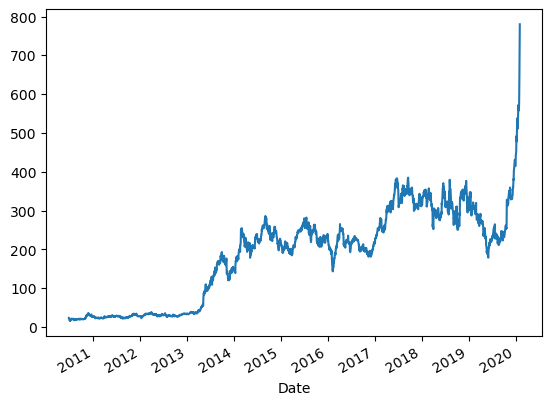

In [11]:
df_final['Adj Close'].plot()

In [12]:
X=df_final.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

<AxesSubplot:title={'center':'Correlation with Adj Close'}>

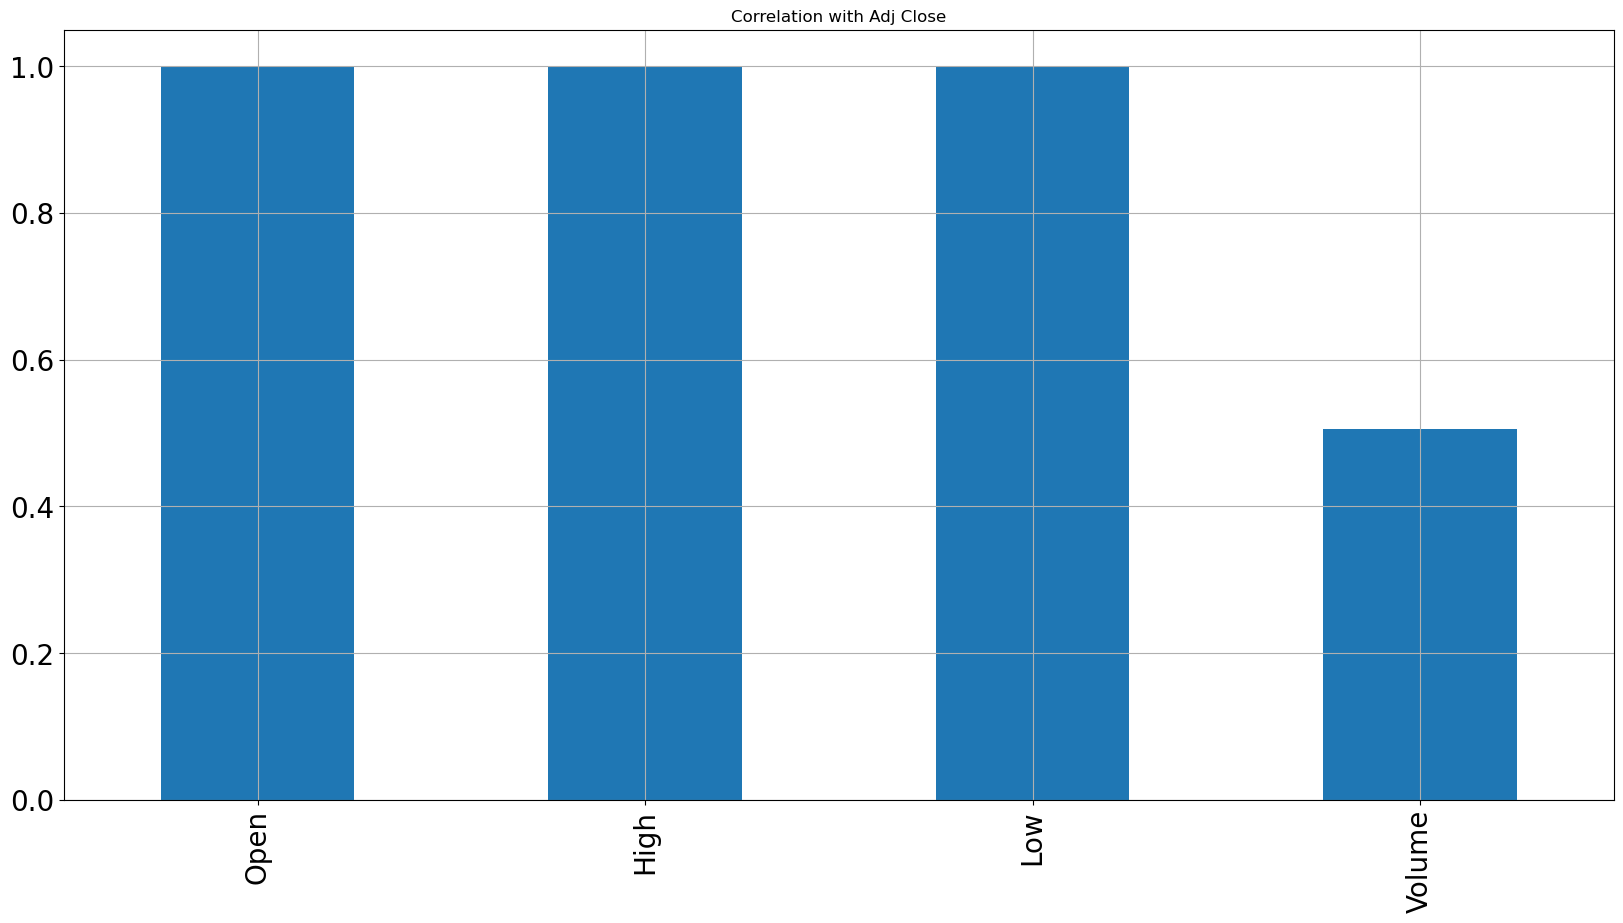

In [13]:
X.corrwith(df_final['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)

In [14]:
test = df_final
target_adj_close = pd.DataFrame(test['Adj Close'])
display(test.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [15]:
feature_columns = ['Open', 'High', 'Low', 'Volume']

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
2010-06-29,0.004349,0.010877,0.003887,0.397214
2010-06-30,0.014676,0.017920,0.012634,0.363576
2010-07-01,0.013474,0.012073,0.008033,0.172543
2010-07-02,0.010433,0.008408,0.005664,0.106958
2010-07-06,0.005870,0.004379,0.001291,0.143747


In [17]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume
Date,,,,
2010-06-29,0.004349,0.010877,0.003887,0.397214
2010-06-30,0.014676,0.017920,0.012634,0.363576
2010-07-01,0.013474,0.012073,0.008033,0.172543
2010-07-02,0.010433,0.008408,0.005664,0.106958
2010-07-06,0.005870,0.004379,0.001291,0.143747


Shape of features :  (2416, 4)
Shape of target :  (2416, 1)


,Open,High,Low,Volume
Date,,,,
2020-01-27,0.799711,0.711895,0.796155,0.287340
2020-01-28,0.840012,0.727970,0.824703,0.248581
2020-01-29,0.850962,0.744851,0.838901,0.376663
2020-01-30,0.937237,0.824226,0.915692,0.615322
2020-01-31,0.948764,0.826981,0.937741,0.332310


,Adj Close
Date,
2020-01-27,566.900024
2020-01-28,580.989990
2020-01-29,640.809998
2020-01-30,650.570007
2020-01-31,780.000000



 -----After process------ 

Shape of features :  (2326, 4)
Shape of target :  (2326, 1)


,Adj Close
Date,
2019-09-18,246.600006
2019-09-19,240.619995
2019-09-20,241.229996
2019-09-23,223.210007
2019-09-24,228.699997


In [19]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()


In [20]:
X_train.shape

(2115, 4)

In [21]:
X_test.shape

(211, 4)

In [22]:
y_train.shape

(2115,)

In [23]:
y_test.shape

(211,)

In [24]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

RMSE:  98.31971018798377
R2 score:  0.24297206255715353


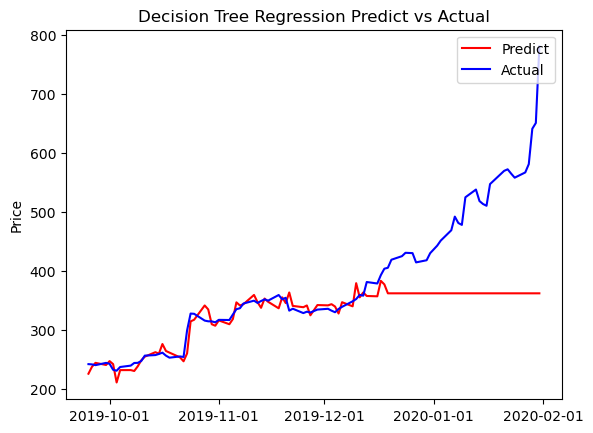

In [25]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

In [26]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [27]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])


Epoch 1/200
265/265 [==============================] - 2s 3ms/step - loss: 41381.2852
Epoch 2/200
265/265 [==============================] - 1s 3ms/step - loss: 39464.3555
Epoch 3/200
265/265 [==============================] - 1s 2ms/step - loss: 36020.5664
Epoch 4/200
265/265 [==============================] - 1s 2ms/step - loss: 31502.2812
Epoch 5/200
265/265 [==============================] - 1s 3ms/step - loss: 26567.0371
Epoch 6/200
265/265 [==============================] - 1s 2ms/step - loss: 21705.1504
Epoch 7/200
265/265 [==============================] - 1s 2ms/step - loss: 17238.2949
Epoch 8/200
265/265 [==============================] - 1s 2ms/step - loss: 13362.5850
Epoch 9/200
265/265 [==============================] - 1s 2ms/step - loss: 10174.4199
Epoch 10/200
265/265 [==============================] - 1s 2ms/step - loss: 7686.4985
Epoch 11/200
265/265 [==============================] - 1s 3ms/step - loss: 5843.2363
Epoch 12/200
265/265 [==============================] 

265/265 [==============================] - 1s 2ms/step - loss: 56.9953
Epoch 98/200
265/265 [==============================] - 1s 3ms/step - loss: 56.8497
Epoch 99/200
265/265 [==============================] - 1s 3ms/step - loss: 56.7042
Epoch 100/200
265/265 [==============================] - 1s 2ms/step - loss: 56.5589
Epoch 101/200
265/265 [==============================] - 1s 2ms/step - loss: 56.4136
Epoch 102/200
265/265 [==============================] - 1s 2ms/step - loss: 56.2686
Epoch 103/200
265/265 [==============================] - 1s 2ms/step - loss: 56.1238
Epoch 104/200
265/265 [==============================] - 1s 2ms/step - loss: 55.9793
Epoch 105/200
265/265 [==============================] - 1s 2ms/step - loss: 55.8350
Epoch 106/200
265/265 [==============================] - 1s 2ms/step - loss: 55.6912
Epoch 107/200
265/265 [==============================] - 1s 2ms/step - loss: 55.5477
Epoch 108/200
265/265 [==============================] - 1s 2ms/step - loss: 55.4

265/265 [==============================] - 1s 2ms/step - loss: 47.9689
Epoch 194/200
265/265 [==============================] - 1s 3ms/step - loss: 47.9255
Epoch 195/200
265/265 [==============================] - 1s 2ms/step - loss: 47.8828
Epoch 196/200
265/265 [==============================] - 1s 2ms/step - loss: 47.8405
Epoch 197/200
265/265 [==============================] - 1s 2ms/step - loss: 47.7988
Epoch 198/200
265/265 [==============================] - 1s 2ms/step - loss: 47.7577
Epoch 199/200
265/265 [==============================] - 1s 2ms/step - loss: 47.7170
Epoch 200/200
265/265 [==============================] - 1s 2ms/step - loss: 47.6769


In [28]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

67/67 [==============================] - 0s 2ms/step
The R2 score on the Train set is:	0.996
The R2 score on the Test set is:	0.956


In [29]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

211/211 [==============================] - 1s 2ms/step - loss: 97.3925


In [30]:
print('LSTM: %f'%score_lstm)

LSTM: 97.392548


In [31]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

7/7 [==============================] - 0s 2ms/step


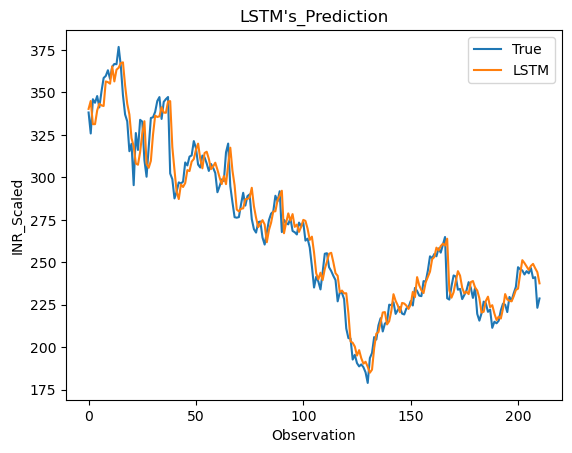

In [32]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

In [33]:
col1 = pd.DataFrame(y_test, columns=['True'])

col2 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM_prediction'])

col3 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3], axis=1)
results.to_excel('PredictionResults_LSTM_NonShift.xlsx')